In [95]:
from FullyMobile import PROJECT_ROOT
import json
import seaborn as sns
import pandas as pd

### Budget Sensitivity

In [96]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_budget_sensitivity_cover.json") as f:
    data = json.load(f)
    dict_frame["cover_fac"] = {int(key): val["paths"] for key, val in data.items()} 
    dict_frame["cover_obj"] = {int(key): val["objective"] for key, val in data.items()} 
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_budget_sensitivity_supplier.json") as f:
    data = json.load(f)
    dict_frame["supplier_fac"] = {int(key): val["paths"] for key, val in data.items()} 
    dict_frame["supplier_obj"] = {int(key): val["objective"] for key, val in data.items()} 

In [97]:
df = pd.DataFrame(dict_frame)
df.index.name = 'k' 
df

,cover_fac,cover_obj,supplier_fac,supplier_obj
k,,,,
3,"[[74647, 859963, 2600238, 2127148, 1678033, 26...",2.883926,"[[122888, 122888, 122888, 122888, 122888, 1228...",4.713846
4,"[[781204, 2468603, 754967, 2100792, 2521304, 1...",2.259715,"[[122888, 122888, 122888, 122888, 122888, 1228...",3.134121
5,"[[1176071, 2363976, 2626760, 2363976, 728600, ...",1.729681,"[[106561, 106561, 106561, 106561, 106561, 1065...",3.221558
6,"[[134126, 2100792, 1677999, 56513, 100340, 249...",1.443902,"[[106561, 106561, 106561, 106561, 106561, 1065...",3.221558
7,"[[1387407, 2416394, 2416397, 2574240, 132685, ...",1.311446,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.153957
8,"[[2732510, 1519554, 2416397, 1387381, 132685, ...",1.256056,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.197708
9,"[[438544, 307017, 2521329, 2521329, 97015, 257...",1.115427,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",2.475715
10,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484,"[[2547776, 2547776, 2547776, 2547776, 2547776,...",1.777087


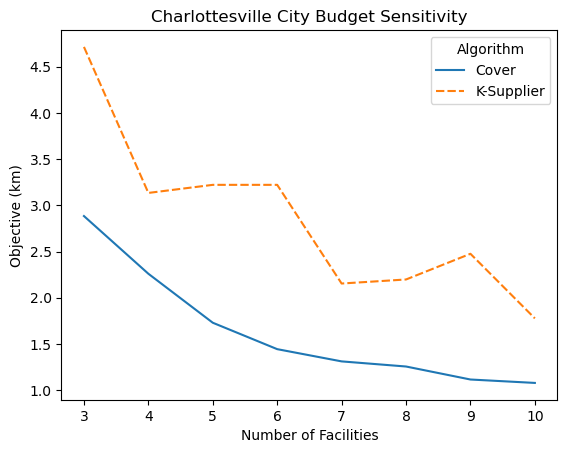

In [98]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df[['cover_obj', 'supplier_obj']])
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Number of Facilities")
plt.title("Charlottesville City Budget Sensitivity")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])
plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"cville_budget_sensitivity.png", dpi=300)

### Percentile Sensitivity

In [99]:
k = 5
m = 5

In [100]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/f"percentile_sensitivity_{m}_{k}.json") as f:
    data = json.load(f)
    percentile = data["percentile_list"][1:]
    dict_frame["cover"] = {int(percentile[i]): val for i, val in enumerate(data["cover"]["obj_list"])} 
    dict_frame["supplier"] = {int(percentile[i]): val for i, val in enumerate(data["supplier"]["obj_list"])} 

In [101]:
df = pd.DataFrame(dict_frame)
df.index.name = 'percentile' 
df

,cover,supplier
percentile,,
1,0.093926,0.165068
2,0.154069,0.266444
3,0.177637,0.312266
4,0.220818,0.379710
5,0.304219,0.403399
...,...,...
96,1.682926,2.230673
97,1.689158,2.250368
98,1.707403,2.356574


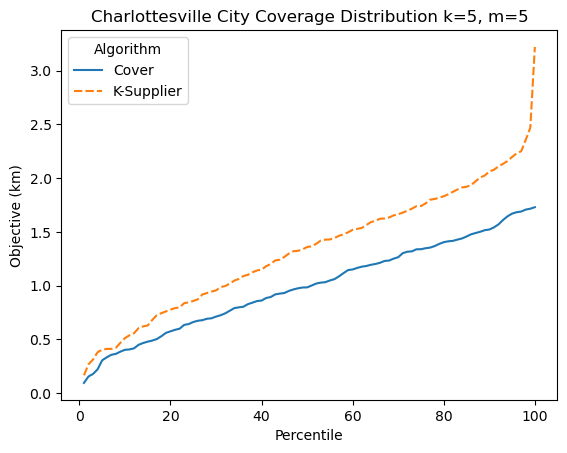

In [102]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df)
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Percentile")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])
plt.title(f"Charlottesville City Coverage Distribution k={k}, m={m}")
plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/f"cville_percentile_sensitivity_{m}_{k}.png", dpi=300)

In [103]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"percentile_sensitivity_3_5.json") as f:
    data = json.load(f)
    percentile = data["percentile_list"][1:]
    dict_frame["cover"] = {int(percentile[i]): val for i, val in enumerate(data["cover"]["obj_list"])} 
    dict_frame["supplier"] = {int(percentile[i]): val for i, val in enumerate(data["supplier"]["obj_list"])} 

In [104]:
df_3 = pd.DataFrame(dict_frame)
df_3.index.name = 'percentile' 
df_3

,cover,supplier
percentile,,
1,0.123903,0.165068
2,0.150543,0.266444
3,0.177585,0.312266
4,0.219604,0.379710
5,0.247178,0.403399
...,...,...
96,1.893625,2.230673
97,1.920990,2.250368
98,1.952778,2.356574


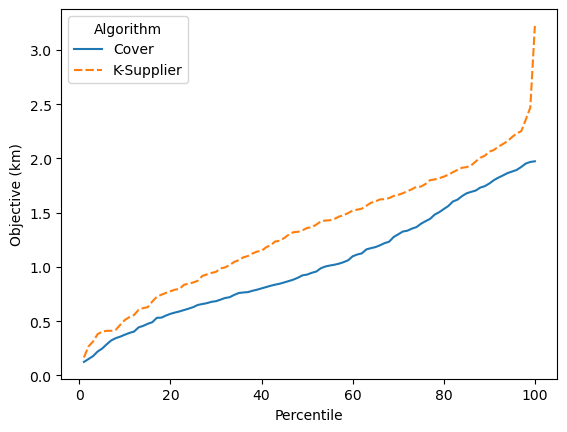

In [105]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data = df_3)
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Percentile")
plt.legend(title='Algorithm', labels=['Cover', 'K-Supplier'])

### Budget Movement Sensitivty

In [108]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = [m for m in m_values for k in k_values]
    dict_frame["k"] = [k for m in m_values for k in k_values]

In [109]:
df = pd.DataFrame(dict_frame)
df

,fac,objective,m,k
0,"[[1863114, 2521232, 2626728, 2521229, 2653323,...",2.945122,1,3
1,"[[2494984, 2285133, 2574282, 50604, 2021744, 1...",2.399130,1,5
2,"[[1149572, 1809970, 1334708, 2521329, 49206, 2...",1.149585,1,10
3,"[[1968881, 2626728, 2337742, 135791, 73846, 26...",2.782115,3,3
4,"[[2653281, 1809960, 2337742, 2416397, 2074415,...",1.973578,3,5
5,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078080,3,10
6,"[[1968881, 2626728, 2337742, 135791, 73846, 26...",2.782115,5,3
7,"[[1176071, 2363976, 2626760, 2363976, 728600, ...",1.729681,5,5
8,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484,5,10


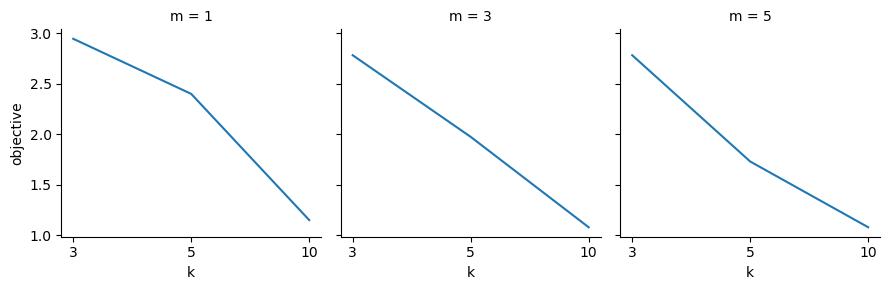

In [110]:
g = sns.FacetGrid(df, col="m")
fig = g.map(sns.lineplot, "k", "objective")
#fig.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"budget_sensitivity_wrt_movement.png", dpi=300)

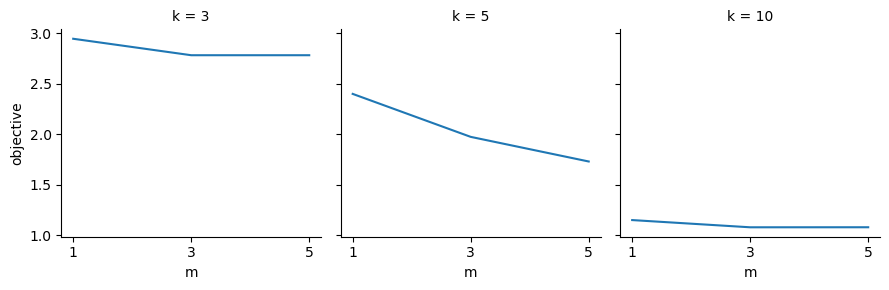

In [111]:
g = sns.FacetGrid(df, col="k")
fig = g.map(sns.lineplot, "m", "objective")
#fig.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"movement_sensitivity_wrt_budget.png", dpi=300)

In [112]:
from FullyMobile.utils import *
import math

def calculate_objective_percentile_list(facilities, location_directory, pid_assignment, percentile_list):
    distance_list = list()
    
    START = min(pid_assignment.keys())
    END = max(pid_assignment.keys())
    
    for hr in range(START, END):
        for pid, client in pid_assignment[hr]:
            coord_client = (location_directory[client]['latitude'], location_directory[client]['longitude'])
            client_cost = min([calculate_dist(coord_client, (location_directory[fac[hr-START]]['latitude'], location_directory[fac[hr-START]]['longitude'])) for fac in facilities])
            distance_list.append(client_cost)
    
    distance_list = sorted(distance_list)
    return [distance_list[math.ceil(len(distance_list)*p/100)-1] for p in percentile_list if p!=0]

In [113]:
from FullyMobile import data

day = 5
start = 6
end = 20

potential_facilities, location_directory, pid_assignment = data.get_data("charlottesville_city", day, start, end)
print(len(potential_facilities), len(location_directory), sum(len(val) for val in pid_assignment.values()))

percentile_list = [i for i in range(0, 101)]

3142 13039 517


In [114]:
dict_frame = {}
df = pd.DataFrame(columns = ['m', 'k', 'fac', 'alg', 'percentile', 'objective'])

with open(PROJECT_ROOT/"Experiments"/"output"/"cville_budget_sensitivity_supplier.json") as f:
    supplier_runs = json.load(f)

with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget.json") as f:
    data = json.load(f)
    
    for m in data.keys():
        for k in data[m].keys():
            cover_fac = data[m][k]["paths"]
            supplier_fac = supplier_runs[k]["paths"]
            objective_list_cover = calculate_objective_percentile_list(cover_fac, location_directory, pid_assignment, percentile_list)
            objective_list_supplier = calculate_objective_percentile_list(supplier_fac, location_directory, pid_assignment, percentile_list)
            for percentile, p_obj_cover, p_obj_supplier in zip(percentile_list[1:], objective_list_cover, objective_list_supplier):
                df = pd.concat([df, pd.DataFrame({'m': int(m), 'k': int(k), 'alg': 'Cover', 'fac': cover_fac,
                                                  'objective': p_obj_cover, 'percentile': percentile})], ignore_index=True)

                df = pd.concat([df, pd.DataFrame({'m': int(m), 'k': int(k), 'alg': 'Supplier', 'fac': supplier_fac,
                                                  'objective': p_obj_supplier, 'percentile': percentile})], ignore_index=True)
df

,m,k,fac,alg,percentile,objective
0,1,3,"[1863114, 2521232, 2626728, 2521229, 2653323, ...",Cover,1,0.165906
1,1,3,"[2732535, 2732535, 754995, 1202662, 2258486, 2...",Cover,1,0.165906
2,1,3,"[2732583, 2706030, 2495059, 2732528, 2732528, ...",Cover,1,0.165906
3,1,3,"[122888, 122888, 122888, 122888, 122888, 12288...",Supplier,1,0.280934
4,1,3,"[98345, 98345, 98345, 98345, 98345, 98345, 983...",Supplier,1,0.280934
...,...,...,...,...,...,...
10795,5,10,"[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 8...",Supplier,100,1.777087
10796,5,10,"[32795, 32795, 32795, 32795, 32795, 32795, 327...",Supplier,100,1.777087
10797,5,10,"[16444, 16444, 16444, 16444, 16444, 16444, 164...",Supplier,100,1.777087
10798,5,10,"[16447, 16447, 16447, 16447, 16447, 16447, 164...",Supplier,100,1.777087


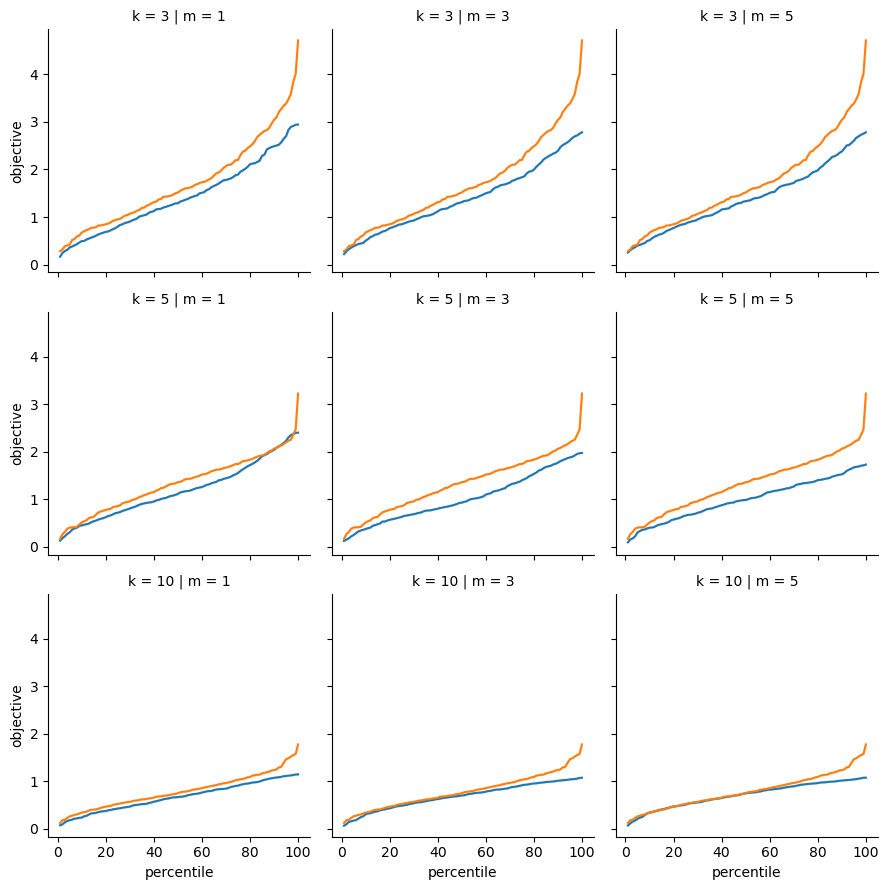

In [115]:
g = sns.FacetGrid(df, col="m", row="k", hue='alg')
g.map(sns.lineplot, "percentile", "objective")

In [116]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget_long_first.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = [float(m) for m in m_values for k in k_values]
    dict_frame["k"] = [int(k) for m in m_values for k in k_values]

with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget_long_mid.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = dict_frame["fac"]+ [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = dict_frame["objective"]+ [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = dict_frame["m"] + [float(m) for m in m_values for k in k_values]
    dict_frame["k"] = dict_frame["k"] + [int(k) for m in m_values for k in k_values]

with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget_long_final.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = dict_frame["fac"]+ [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = dict_frame["objective"]+ [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = dict_frame["m"] + [float(m) for m in m_values for k in k_values]
    dict_frame["k"] = dict_frame["k"] + [int(k) for m in m_values for k in k_values]

In [117]:
df = pd.DataFrame(dict_frame)
df

,fac,objective,m,k
0,"[[1863114, 2521232, 2626728, 2521229, 2653323,...",2.945122,1.0,3
1,"[[58695, 2337742, 675521, 2521232, 1704174, 20...",2.600737,1.0,4
2,"[[2494984, 2285133, 2574282, 50604, 2021744, 1...",2.399130,1.0,5
3,"[[56513, 58695, 2626760, 2363976, 94936, 13347...",1.711093,1.0,6
4,"[[2494984, 2258513, 2258513, 675555, 2337742, ...",1.597775,1.0,7
...,...,...,...,...
131,"[[134126, 2100792, 1677999, 56513, 100340, 249...",1.443902,9.0,6
132,"[[1387407, 2416394, 2416397, 2574240, 132685, ...",1.311446,9.0,7
133,"[[2732510, 1519554, 2416397, 1387381, 132685, ...",1.256056,9.0,8
134,"[[438544, 307017, 2521329, 2521329, 97015, 257...",1.115427,9.0,9


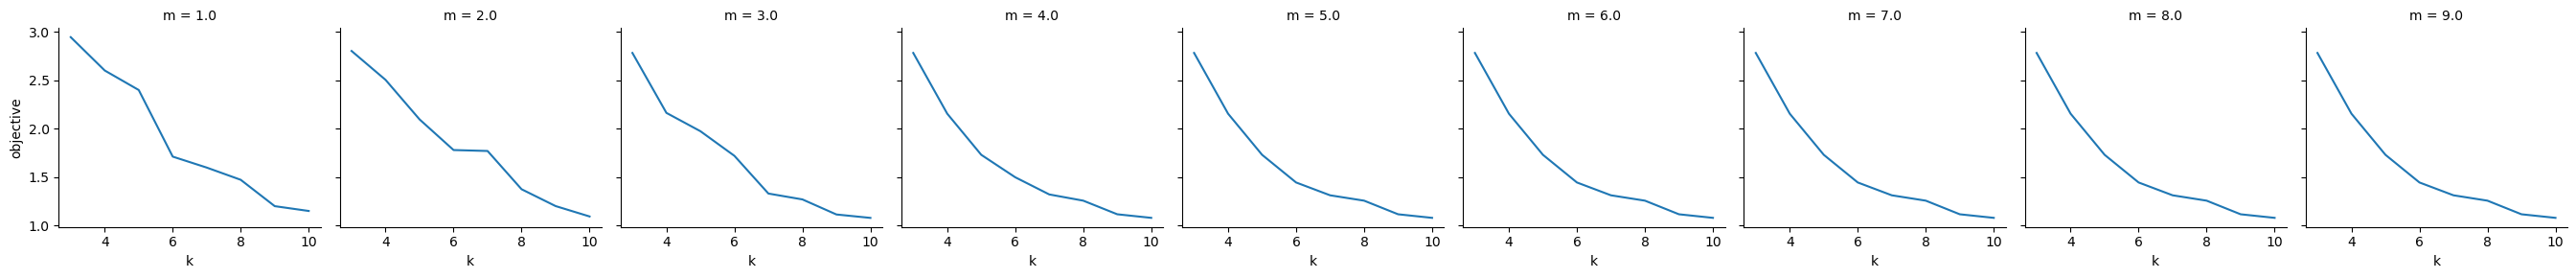

In [118]:
df_whole_m = df[df['m'].isin(set(range(1, 10)))]
g = sns.FacetGrid(df_whole_m, col="m")
fig = g.map(sns.lineplot, "k", "objective")
#plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"budget_sensitivity_wrt_movement_full.png", dpi=500)

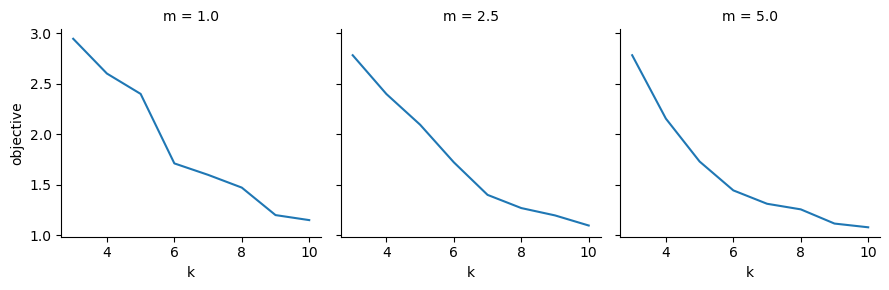

In [119]:
g = sns.FacetGrid(df[(df['m']==1)|(df['m']==2.5)|(df['m']==5)], col="m")
fig = g.map(sns.lineplot, "k", "objective")
#fig.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"budget_sensitivity_wrt_movement.png")

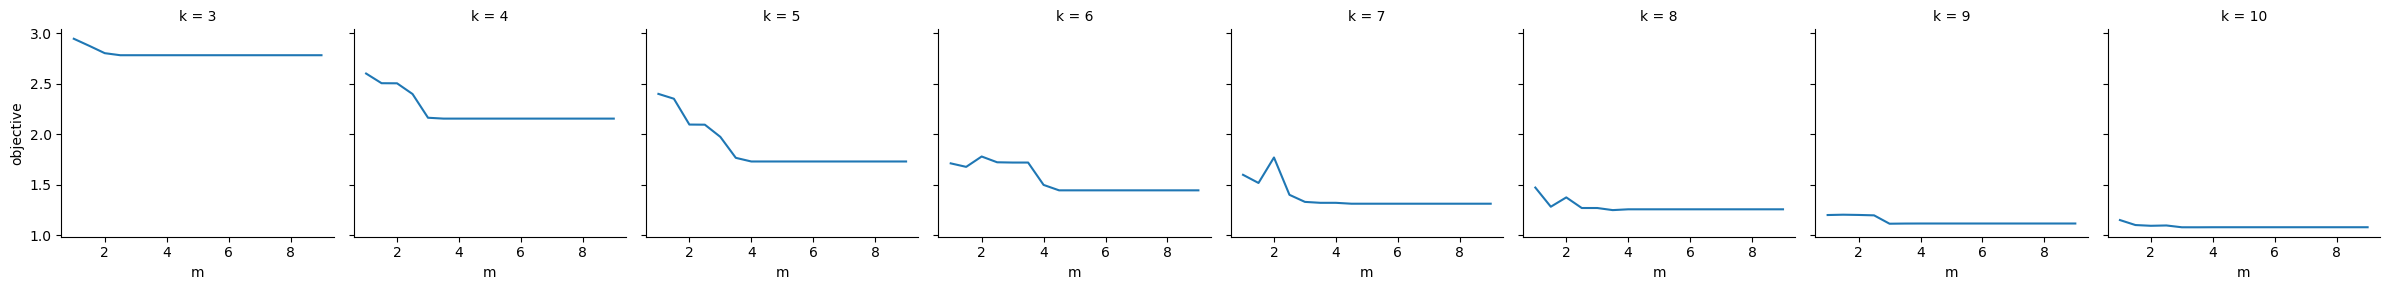

In [120]:
g = sns.FacetGrid(df, col="k")
fig = g.map(sns.lineplot, "m", "objective")
#plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"movement_sensitivity_wrt_budget_full.png", dpi=300)

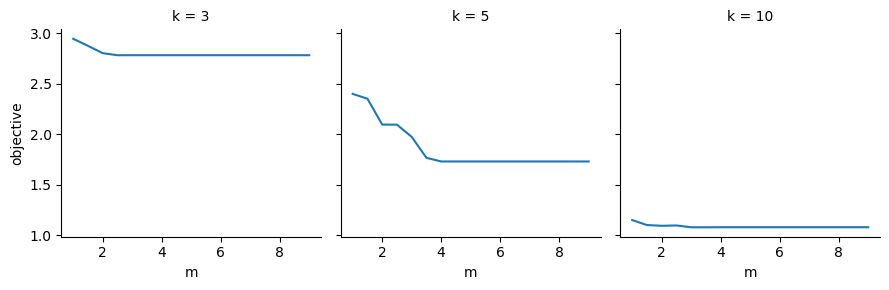

In [121]:
g = sns.FacetGrid(df[(df['k']==3)|(df['k']==5)|(df['k']==10)], col="k")
fig = g.map(sns.lineplot, "m", "objective")
#plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"movement_sensitivity_wrt_budget.png", dpi=300)

In [83]:
x = []
y = []
for k in range(3, 11):
    diff = df[(df['k']==k) & (df['m']==float(5))]['objective'].iloc[0] - df[(df['k']==k) & (df['m']==float(1))]['objective'].iloc[0]
    x.append(k)
    y.append(diff)

Text(0, 0.5, 'Objective difference after increasing m')

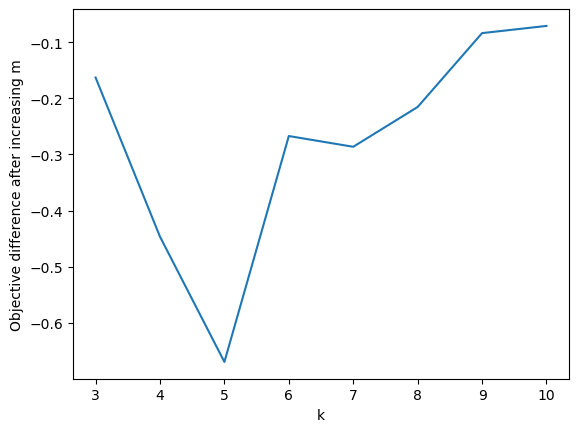

In [84]:
plt.plot(x, y)
plt.xlabel("k")
plt.ylabel("Objective difference after increasing m")

In [85]:
x = []
y = []
for travel in range(10, 55, 5):
    m = travel/10
    diff = df[(df['k']==10) & (df['m']==m)]['objective'].iloc[0] - df[(df['k']==3) & (df['m']==m)]['objective'].iloc[0]
    x.append(m)
    y.append(diff)

Text(0, 0.5, 'Objective difference after increasing k')

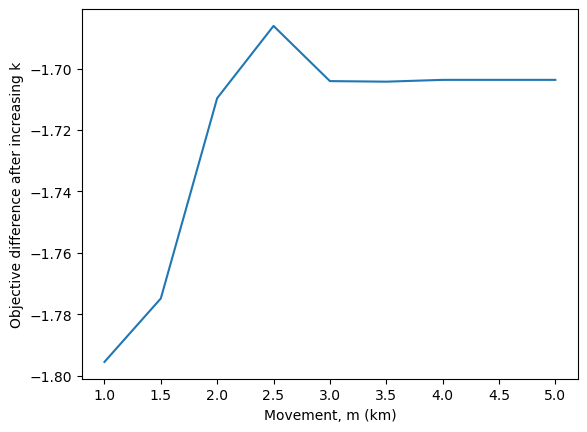

In [87]:
plt.plot(x, y)
plt.xlabel("Movement, m (km)")
plt.ylabel("Objective difference after increasing k")

### Movement Sensitivity

In [45]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_sensitivity.json") as f:
    data = json.load(f)
    dict_frame["cover_fac"] = {float(key): val["paths"] for key, val in data.items()}
    dict_frame["cover_obj"] = {float(key): val["objective"] for key, val in data.items()}

In [46]:
df_movement = pd.DataFrame(dict_frame)
df_movement.index.name = 'm'
df_movement

,cover_fac,cover_obj
m,,
1.0,"[[1149572, 1809970, 1334708, 2521329, 49206, 2...",1.149585
1.5,"[[2653280, 122502, 1598550, 2521329, 2337742, ...",1.100210
2.0,"[[1598501, 2047805, 2521329, 2521329, 2626820,...",1.092816
2.5,"[[2653280, 2047805, 2521329, 2521329, 2626820,...",1.096060
3.0,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078080
3.5,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.077897
4.0,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484
4.5,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484
5.0,"[[306962, 2047805, 2521329, 781274, 2626820, 2...",1.078484


Text(0.5, 0, 'Movement, m (km)')

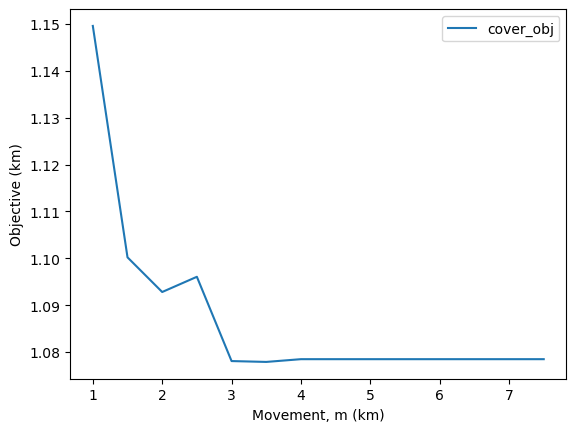

In [47]:
plot = sns.lineplot(data = df_movement[["cover_obj"]])
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Movement, m (km)")

In [48]:
dict_frame = {}
with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget_long_first.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = [float(m) for m in m_values for k in k_values]
    dict_frame["k"] = [int(k) for m in m_values for k in k_values]

with open(PROJECT_ROOT/"Experiments"/"output"/"cville_movement_budget_long_final.json") as f:
    data = json.load(f)
    m_values = data.keys()
    k_values = data[list(data.keys())[0]].keys()
    dict_frame["fac"] = dict_frame["fac"]+ [data[m][k]["paths"] for m in m_values for k in k_values]
    dict_frame["objective"] = dict_frame["objective"]+ [data[m][k]["objective"] for m in m_values for k in k_values]
    dict_frame["m"] = dict_frame["m"] + [float(m) for m in m_values for k in k_values]
    dict_frame["k"] = dict_frame["k"] + [int(k) for m in m_values for k in k_values]

In [49]:
df = pd.DataFrame(dict_frame)
df

,fac,objective,m,k
0,"[[1863114, 2521232, 2626728, 2521229, 2653323,...",2.945122,1.0,3
1,"[[58695, 2337742, 675521, 2521232, 1704174, 20...",2.600737,1.0,4
2,"[[2494984, 2285133, 2574282, 50604, 2021744, 1...",2.399130,1.0,5
3,"[[56513, 58695, 2626760, 2363976, 94936, 13347...",1.711093,1.0,6
4,"[[2494984, 2258513, 2258513, 675555, 2337742, ...",1.597775,1.0,7
...,...,...,...,...
91,"[[134126, 2100792, 1677999, 56513, 100340, 249...",1.443902,6.5,6
92,"[[1387407, 2416394, 2416397, 2574240, 132685, ...",1.311446,6.5,7
93,"[[2732510, 1519554, 2416397, 1387381, 132685, ...",1.256056,6.5,8
94,"[[438544, 307017, 2521329, 2521329, 97015, 257...",1.115427,6.5,9


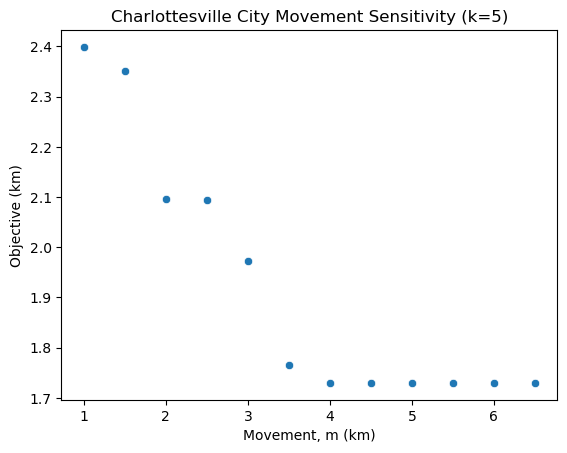

In [57]:
df_5 = df[(df['k']==5)]
df_5 = df_5.set_index('m')
#print(df_5.head())

plot = sns.scatterplot(data = df_5["objective"])
plot.set_ylabel("Objective (km)")
plot.set_xlabel("Movement, m (km)")
plt.title("Charlottesville City Movement Sensitivity (k=5)")

plt.savefig(PROJECT_ROOT/"Experiments"/"output"/"plots"/"cville_movement_sensitivity_5.png", dpi=300)